In [2]:
import xarray as xr
import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from random import randint
import seaborn as sns

# import sys
# sys.path.append('/home/nmpnguyen/Codes')
# import  Rayleigh_Fit_test2 

In [4]:
# import pickle
### Ouvrir le fichier des jours sélectionés
# with open('/home/nmpnguyen/Codes/ClearSkyLIO3Tlist', 'r') as f: #
#     all_data = [line.strip() for line in f.readlines()]
    
# metadata_line = all_data[:4]
# listdays = all_data[4:]
# w = int(all_data[3].split(': ')[1])

# m = 30 # 13:100m, 30:250m
# dep_total = np.empty([1, 16380], int)
# ta_total = np.empty([1, 16380], int)
# binsDep = np.arange(0.0, 2.0, 0.05)
# for l in listdays:
l='2019-01-11'
picklefilename = Path('/homedata/nmpnguyen/OPAR/Processed/RF/LIO3T', l+'RF_v1.pkl')
simulpath = Path('/homedata/nmpnguyen/OPAR/Processed/LIO3T', l+'_simul.pkl')
print(picklefilename, simulpath)
loaded_list = pd.read_pickle(picklefilename)
simul = pd.read_pickle(simulpath)
ta = simul['ta'].unstack().values
ta_total = np.append(ta_total, ta, axis=0)

alt = np.unique([line[1] for line in simul['ta'].index])
time = np.unique([line[0] for line in simul['ta'].index])

p00532 = loaded_list[0].values
s00532 = loaded_list[1].values
dep = np.array(p00532/(p00532+s00532))
dep_total = np.append(dep_total, dep, axis=0)
    
opaltN = np.nanmean(alt.reshape(-1, m), axis=1)
depN = np.nanmean(dep_total[1:,:].reshape(-1, int(len(alt)/m), m), axis=2)
taN = np.nanmean(ta_total[1:,:].reshape(-1, int(len(alt)/m), m), axis=2)

counts = np.array([np.histogram(depN[:,i], bins=binsDep, density=True)[0] 
                   for i in range(len(opaltN))])
probabs = counts/depN.shape[0]
X2d, Y2d = np.meshgrid(np.linspace(0.0, 2.0, len(binsDep)-1), opaltN)
#     plt.close()
#     f, ax = plt.subplots()
#     c = ax.pcolor(X2d, Y2d, probabs, cmap='viridis', shading='nearest') #vmin=2, vmax=18, 
#     ax.set_ylim(0, 20000)
#     ax.set_xlim(0.0, 2.0) 
#     ax.set(xlabel='Depolarization', ylabel='Altitude, km')
#     plt.colorbar(c, ax=ax, label='Counts/Lenght of array')
#     plt.savefig(Path('/homedata/nmpnguyen/OPAR/Processed/Cirrus/',l+'Dist_100m_Dep.png'))

DF = pd.DataFrame(np.stack((ta_total[:,(alt<20000)].flatten(), dep_total[:,(alt<20000)].flatten()), axis=-1),
                 columns=["Temperature", "Depolarization"])
# H, xedges, yedges = np.histogram2d(DF['Depolarization'].values, DF['Temperature'].values, density=True, 
#               bins = (np.arange(0.0, 2.0, 0.05), np.arange(DF['Temperature'].values.min(), DF['Temperature'].values.max(), 5)))
# X2d, Y2d = np.meshgrid(xedges, yedges)

# f, ax = plt.subplots()
# # c = ax.hist2d(DF['Dep'], DF['Temperature'], bins=100, density=True)
# c = ax.pcolormesh(X2d, Y2d, H.T)
# plt.colorbar(c, ax=ax, label='Density')
# ax.set(xlabel='Depolarisation', ylabel='Temperature, K')
# plt.gca().invert_yaxis()

/homedata/nmpnguyen/OPAR/Processed/RF/LIO3T/2019-01-11RF_v1.pkl /homedata/nmpnguyen/OPAR/Processed/LIO3T/2019-01-11_simul.pkl


<ipython-input-4-81f543762bbd>:29: RuntimeWarning: invalid value encountered in true_divide
  dep = np.array(p00532/(p00532+s00532))


In [5]:

loaded_list = pd.read_pickle(picklefilename)
simul = pd.read_pickle(simulpath)
ta = simul['ta'].unstack().values
p00532 = loaded_list[0].values
s00532 = loaded_list[1].values

# p00532 = pd.DataFrame(loaded_list[0].stack())
# s00532 = pd.DataFrame(loaded_list[1].stack())
# p00532.columns = ['00532.p']
# s00532.columns = ['00532.s']
# DF = pd.concat([p00532, s00532], axis=1)

In [6]:
alt = np.unique([line[1] for line in simul['ta'].index])
time = np.unique([line[0] for line in simul['ta'].index])

In [19]:
### DEPOLARISATION 1 JOUR
# dep = np.array(df[0].iloc[0,:]/(df[0].iloc[0,:]+df[1].iloc[0,:]))
# depDF = pd.DataFrame(DF['00532.p']/(DF['00532.s']+DF['00532.p']))
dep = np.array((p00532-s00532)/p00532)
dep2 = np.array(s00532/(p00532+s00532))
print(dep[0,:], dep2[0,:])
print(p00532[0,:], s00532[0,:])

[        nan -0.54511808 -0.57200147 ...  0.15207981  3.70562498
 -1.01682385] [       nan 0.60709092 0.61119773 ... 0.45885109 1.58629535 0.66852556]
[ 0.00000000e+00  1.97294673e-11  8.01492283e-11 ...  1.45210140e-06
  2.55545417e-07 -3.42863109e-07] [ 0.00000000e+00  3.04843566e-11  1.25994705e-10 ...  1.23126609e-06
 -6.91410062e-07 -6.91494496e-07]


<ipython-input-19-1926441eb901>:4: RuntimeWarning: divide by zero encountered in true_divide
  dep = np.array((p00532-s00532)/p00532)
<ipython-input-19-1926441eb901>:4: RuntimeWarning: invalid value encountered in true_divide
  dep = np.array((p00532-s00532)/p00532)
<ipython-input-19-1926441eb901>:5: RuntimeWarning: invalid value encountered in true_divide
  dep2 = np.array(s00532/(p00532+s00532))


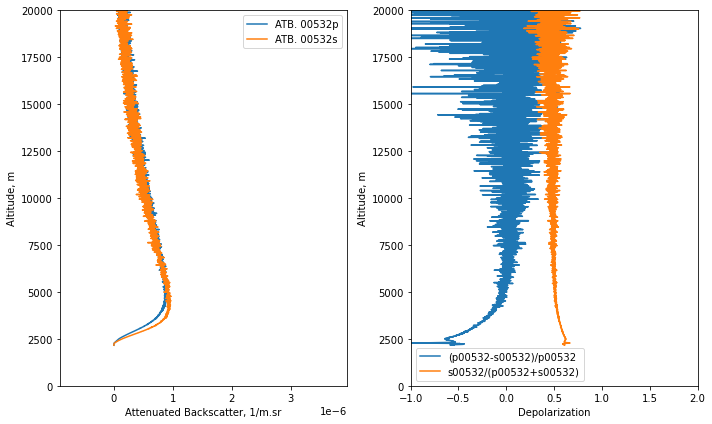

In [15]:
f, (ax2,ax )= plt.subplots(ncols=2, nrows=1, figsize=(10,6))
ax.plot(dep[0,:], alt, label='(p00532-s00532)/p00532')
ax.plot(dep2[0,:], alt, label='s00532/(p00532+s00532)')
ax.set_ylim(0, 20000)
ax.set_xlim(-1, 2)
ax.set(xlabel='Depolarization', ylabel='Altitude, m')
ax.legend()
ax2.plot(p00532[0,:], alt, label='ATB. 00532p')
ax2.plot(s00532[0,:], alt, label='ATB. 00532s')
ax2.set_ylim(0, 20000)
ax2.set(xlabel='Attenuated Backscatter, 1/m.sr', ylabel='Altitude, m')
ax2.legend()
plt.tight_layout()

#### Distribution de la dépolarisation (en altitude et en température)

In [10]:
### Distribution de la dépolarisation (en altitude)

print(f'reshape pour moyenner chaque 250m: {len(alt)%30}')
opaltN = np.nanmean(alt.reshape(-1, 13), axis=1)
depN = np.nanmean(dep.reshape(-1, int(len(alt)/13), 13), axis=2)
dep2N = np.nanmean(dep2.reshape(-1, int(len(alt)/13), 13), axis=2)
# depN = np.reshape(dep[:], (int(len(opar['range'])/13), 13))

print(depN.shape, len(opaltN))

reshape pour moyenner chaque 250m: 0
(202, 1260) 1260


In [46]:
binsDep = np.arange(0.0, 2.0, 0.05)

counts = np.array([np.histogram(depN[:,i], bins=binsDep, density=True)[0] 
                   for i in range(len(opaltN))])
# print(counts/np.sum(counts, axis=0))

probabs = counts/depN.shape[0] #np.sum(counts, axis=0)
# print(probabs.shape)

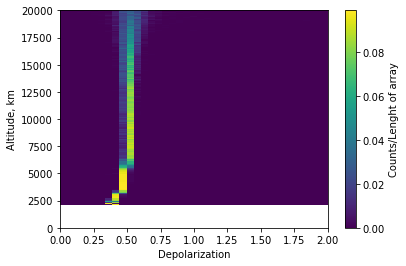

In [47]:

X2d, Y2d = np.meshgrid(np.linspace(0.0, 2.0, len(binsDep)-1), opaltN)
# import numpy.ma as ma
# counts_mask = ma.masked_where(counts == 0, counts)

f, ax = plt.subplots()
c = ax.pcolor(X2d, Y2d, probabs, cmap='viridis', shading='nearest') #vmin=2, vmax=18, 
ax.set_ylim(0, 20000)
ax.set_xlim(0.0, 2.0) 
ax.set(xlabel='Depolarization', ylabel='Altitude, km')
plt.colorbar(c, ax=ax, label='Counts/Lenght of array')



In [26]:
# Indexs = pd.MultiIndex.from_product([opaltN, np.linspace(0.0, 2.0, len(binsDep)-1)], 
#                           names=["alt", "values"])
# countsdf = pd.DataFrame(np.stack((counts.flatten(), probabs.flatten()), axis=-1),
#                         index=Indexs, columns=["counts", "propability"]).reset_index()
# countsdf

# g = sns.displot(countsdf[countsdf['alt'] <20000], x="Depolarization", y="alt", 
#                 stat='probability', cbar=True)

Indexs = pd.MultiIndex.from_product([opaltN, time], 
                          names=["alt", "time"])
countsdf = pd.DataFrame(depN.flatten(),
                        index=Indexs, columns=["Depolarization"]).reset_index()
countsdf.dropna()

,alt,time,Depolarization
0,2268.75,2019-01-11 17:08:16,0.387409
1,2268.75,2019-01-11 17:10:17,0.383632
2,2268.75,2019-01-11 17:12:19,0.399871
3,2268.75,2019-01-11 17:14:20,0.416399
4,2268.75,2019-01-11 17:16:22,0.430026
...,...,...,...
110287,124893.75,2019-01-11 23:47:32,0.367652
110288,124893.75,2019-01-11 23:49:33,0.341785
110289,124893.75,2019-01-11 23:51:35,0.317448
110290,124893.75,2019-01-11 23:53:36,0.561264


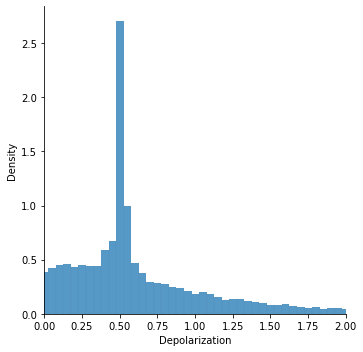

In [34]:
g = sns.displot(countsdf[countsdf['alt'] <20000], x="Depolarization", 
                stat='density', cbar=True, binwidth=(0.05, 100))
g.set(xlim=(0.0, 2.0))

In [11]:
# DF = pd.concat([ta.unstack(), depDF.unstack()], axis= 1).dropna()
# DF.columns = ['Temperature', 'Dep']
# DF = DF.reset_index()
# df = DF.where(DF['range']<20000).dropna()
DF = pd.DataFrame(np.stack((ta[:,(alt<20000)].flatten(), dep[:,(alt<20000)].flatten()), axis=-1),
                 columns=["Temperature", "Depolarization"])
print(DF)

        Temperature  Depolarization
0        287.756067             NaN
1        287.713293        0.392909
2        287.670519        0.388802
3        287.627745        0.386143
4        287.584971        0.394895
...             ...             ...
480553   201.348844        0.682272
480554   201.377878        0.332711
480555   201.406912        0.290387
480556   201.435946        0.600643
480557   201.464980        1.128617

[480558 rows x 2 columns]


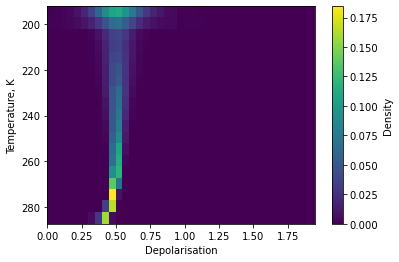

In [53]:

H, xedges, yedges = np.histogram2d(DF['Depolarization'].values, DF['Temperature'].values, density=True, 
              bins = (np.arange(0.0, 2.0, 0.05), np.arange(DF['Temperature'].values.min(), DF['Temperature'].values.max(), 5)))
X2d, Y2d = np.meshgrid(xedges, yedges)

f, ax = plt.subplots()
# c = ax.hist2d(DF['Dep'], DF['Temperature'], bins=100, density=True)
c = ax.pcolormesh(X2d, Y2d, H.T)
plt.colorbar(c, ax=ax, label='Density')
ax.set(xlabel='Depolarisation', ylabel='Temperature, K')
plt.gca().invert_yaxis()



<Figure size 432x288 with 0 Axes>

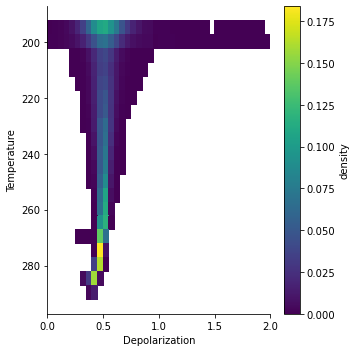

In [12]:
plt.clf()
g = sns.displot(DF, x='Depolarization', y='Temperature', binwidth=(0.05, 5), 
                stat='density', cbar=True, cmap='viridis', cbar_kws={'label': 'density'})
g.fig.axes[0].invert_yaxis()
g.set(xlim=(0.0, 2.0))


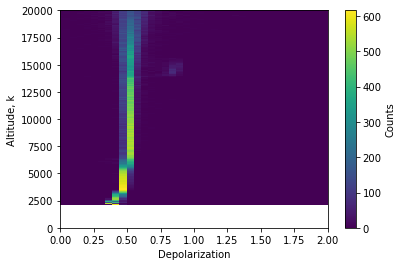

In [118]:
opaltN = np.nanmean(alt.reshape(-1, m), axis=1)
depN = np.nanmean(dep_total[1:,:].reshape(-1, int(len(alt)/m), m), axis=2)
taN = np.nanmean(ta_total[1:,:].reshape(-1, int(len(alt)/m), m), axis=2)

counts = np.array([np.histogram(depN[:,i], bins=binsDep, density=False)[0] 
                   for i in range(len(opaltN))])
probabs = counts/depN.shape[0]
X2d, Y2d = np.meshgrid(np.linspace(0.0, 2.0, len(binsDep)-1), opaltN)

f, ax = plt.subplots()
c = ax.pcolor(X2d, Y2d, counts, cmap='viridis', shading='nearest') #vmin=2, vmax=18, 
ax.set_ylim(0, 20000)
ax.set_xlim(0.0, 2.0) 
ax.set(xlabel='Depolarization', ylabel='Altitude, k')
plt.colorbar(c, ax=ax, label='Counts')

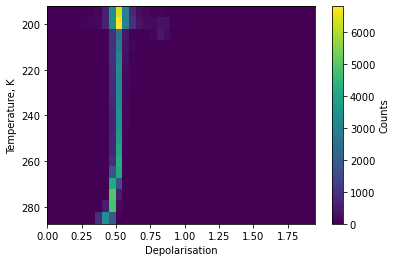

In [119]:
DF = pd.DataFrame(np.stack((taN[:,(opaltN<20000)].flatten(), depN[:,(opaltN<20000)].flatten()), axis=-1),
                 columns=["Temperature", "Depolarization"])
H, xedges, yedges = np.histogram2d(DF['Depolarization'].values, DF['Temperature'].values, density=False, 
                                   bins = (np.arange(0.0, 2.0, 0.05), np.arange(DF['Temperature'].values.min(), DF['Temperature'].values.max(), 5)))
X2d, Y2d = np.meshgrid(xedges, yedges)

f, ax = plt.subplots()
# c = ax.hist2d(DF['Dep'], DF['Temperature'], bins=100, density=True)
c = ax.pcolormesh(X2d, Y2d, H.T)
plt.colorbar(c, ax=ax, label='Counts')
ax.set(xlabel='Depolarisation', ylabel='Temperature, K')
plt.gca().invert_yaxis()

In [85]:
np.histogram(depN[:,1], bins=binsDep, density=False)[0]

array([  0,   0,   0,   0,   0,   0,   3, 546,  72,  10,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0])

In [108]:
DF['Depolarization'].values

array([ 1.39677175e+14,  9.38396020e+13,  9.38399139e+13, ...,
        1.38616565e+00,  4.09303552e-01, -2.99432129e+00])